# מבוא להסתברות וסטטיסטיקה  
במחברת זו, נתנסה בכמה מהעקרונות שדיברנו עליהם בעבר. רבים מהעקרונות בהסתברות וסטטיסטיקה מיוצגים היטב בספריות מרכזיות לעיבוד נתונים בפייתון, כמו `numpy` ו-`pandas`.  


In [117]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt

## משתנים אקראיים והתפלגויות  
נתחיל בדגימה של 30 ערכים מתוך התפלגות אחידה בין 0 ל-9. בנוסף, נחשב את הממוצע והשונות.  


In [118]:
sample = [ random.randint(0,10) for _ in range(30) ]
print(f"Sample: {sample}")
print(f"Mean = {np.mean(sample)}")
print(f"Variance = {np.var(sample)}")

Sample: [0, 8, 1, 0, 7, 4, 3, 3, 6, 7, 1, 0, 6, 3, 1, 5, 9, 2, 4, 2, 5, 6, 8, 7, 1, 9, 8, 2, 3, 7]
Mean = 4.266666666666667
Variance = 8.195555555555556


כדי להעריך באופן חזותי כמה ערכים שונים יש במדגם, ניתן לשרטט את **ההיסטוגרמה**:


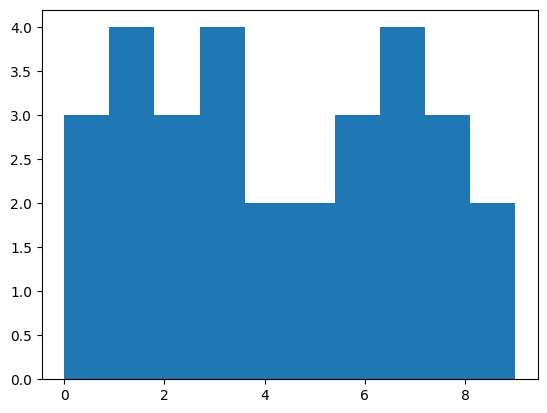

In [119]:
plt.hist(sample)
plt.show()

## ניתוח נתונים אמיתיים

ממוצע ושונות הם מאוד חשובים כאשר מנתחים נתונים מהעולם האמיתי. בואו נטען את הנתונים על שחקני בייסבול מתוך [SOCR MLB Height/Weight Data](http://wiki.stat.ucla.edu/socr/index.php/SOCR_Data_MLB_HeightsWeights)


In [120]:
df = pd.read_csv("../../data/SOCR_MLB.tsv",sep='\t', header=None, names=['Name','Team','Role','Weight','Height','Age'])
df


Empty DataFrame
Columns: [Name, Team, Role, Weight, Height, Age]
Index: []


אנו משתמשים כאן בחבילה שנקראת [**Pandas**](https://pandas.pydata.org/) לניתוח נתונים. נדבר יותר על Pandas ועל עבודה עם נתונים ב-Python בהמשך הקורס.

בואו נחשב ערכים ממוצעים עבור גיל, גובה ומשקל:


In [121]:
df[['Age','Height','Weight']].mean()

Age        28.736712
Height    201.726306
Weight     73.697292
dtype: float64

עכשיו נתמקד בגובה, ונחשב סטיית תקן ושונות:


In [122]:
print(list(df['Height'])[:20])

[180, 215, 210, 210, 188, 176, 209, 200, 231, 180, 188, 180, 185, 160, 180, 185, 197, 189, 185, 219]


In [123]:
mean = df['Height'].mean()
var = df['Height'].var()
std = df['Height'].std()
print(f"Mean = {mean}\nVariance = {var}\nStandard Deviation = {std}")

Mean = 201.72630560928434
Variance = 441.6355706557866
Standard Deviation = 21.01512718628623


בנוסף לממוצע, יש היגיון להסתכל על הערך החציוני והרבעונים. ניתן להמחיש אותם באמצעות **תרשים קופסה**:


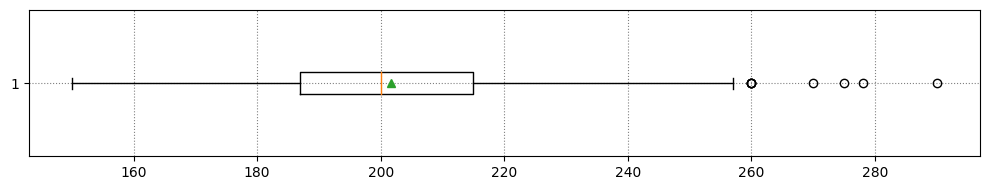

In [124]:
plt.figure(figsize=(10,2))
plt.boxplot(df['Height'], vert=False, showmeans=True)
plt.grid(color='gray', linestyle='dotted')
plt.tight_layout()
plt.show()

אנחנו יכולים גם ליצור תרשימי קופסה של תתי-קבוצות מתוך מערך הנתונים שלנו, למשל, מקובצות לפי תפקיד השחקן.


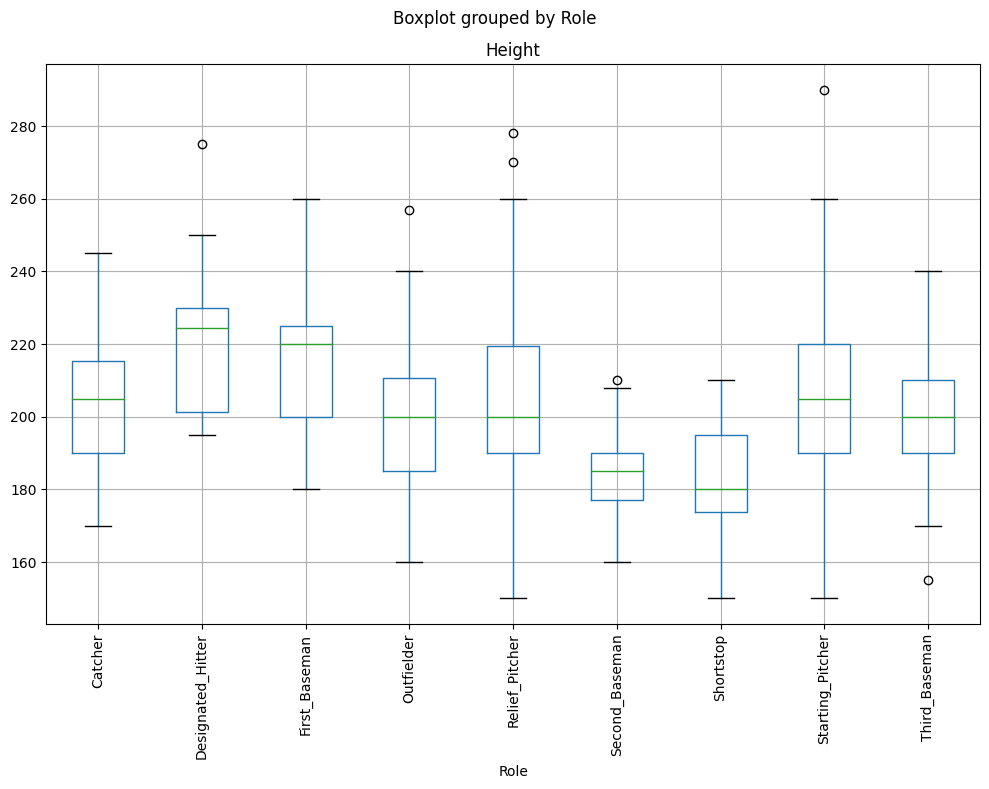

In [125]:
df.boxplot(column='Height', by='Role', figsize=(10,8))
plt.xticks(rotation='vertical')
plt.tight_layout()
plt.show()

> **הערה**: הדיאגרמה הזו מציעה שבממוצע, הגובה של שחקני בסיס ראשון גבוה יותר מהגובה של שחקני בסיס שני. בהמשך נלמד כיצד ניתן לבדוק את ההשערה הזו בצורה פורמלית יותר, וכיצד להראות שהנתונים שלנו משמעותיים מבחינה סטטיסטית כדי להוכיח זאת.

גיל, גובה ומשקל הם כולם משתנים מקריים רציפים. מה לדעתכם ההתפלגות שלהם? דרך טובה לגלות זאת היא לשרטט את ההיסטוגרמה של הערכים:


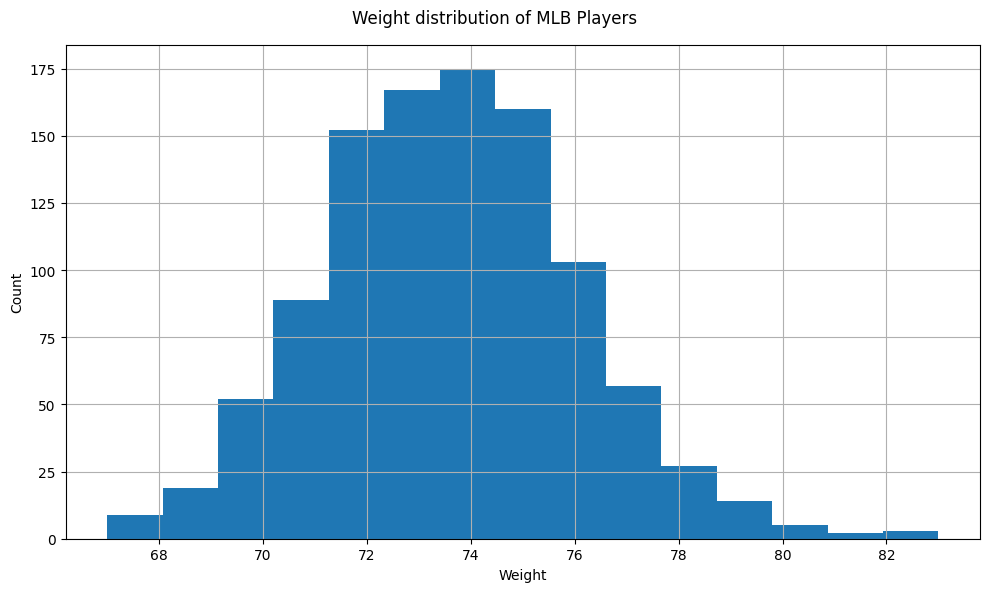

In [126]:
df['Weight'].hist(bins=15, figsize=(10,6))
plt.suptitle('Weight distribution of MLB Players')
plt.xlabel('Weight')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

## התפלגות נורמלית

בואו ניצור מדגם מלאכותי של משקלים שמתקיים בו התפלגות נורמלית עם אותו ממוצע ושונות כמו בנתונים האמיתיים שלנו:


In [127]:
generated = np.random.normal(mean, std, 1000)
generated[:20]

array([183.05261872, 193.52828463, 154.73707302, 204.27140391,
       203.88907247, 213.74665656, 225.10092364, 171.75867917,
       204.3521425 , 207.52870255, 158.53001756, 240.94399197,
       189.9909742 , 180.72442994, 173.4393402 , 175.98883711,
       197.86092769, 188.61598821, 234.19796698, 209.0295457 ])

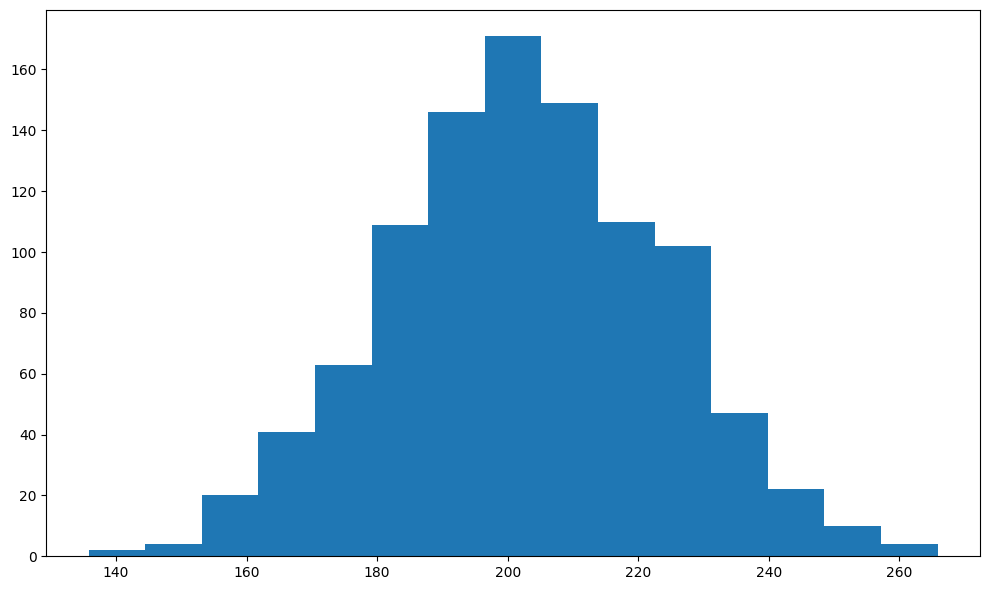

In [128]:
plt.figure(figsize=(10,6))
plt.hist(generated, bins=15)
plt.tight_layout()
plt.show()

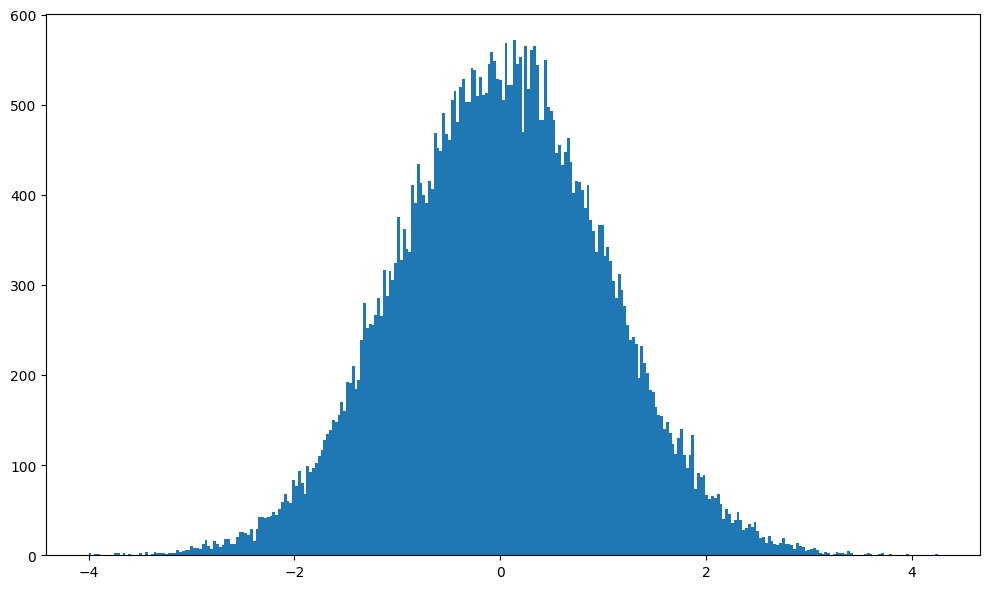

In [129]:
plt.figure(figsize=(10,6))
plt.hist(np.random.normal(0,1,50000), bins=300)
plt.tight_layout()
plt.show()

מכיוון שרוב הערכים בחיים האמיתיים מתפלגים נורמלית, אין להשתמש במחולל מספרים אקראיים אחיד ליצירת נתוני דגימה. הנה מה שקורה אם ננסה ליצור משקלים עם התפלגות אחידה (נוצר על ידי `np.random.rand`):


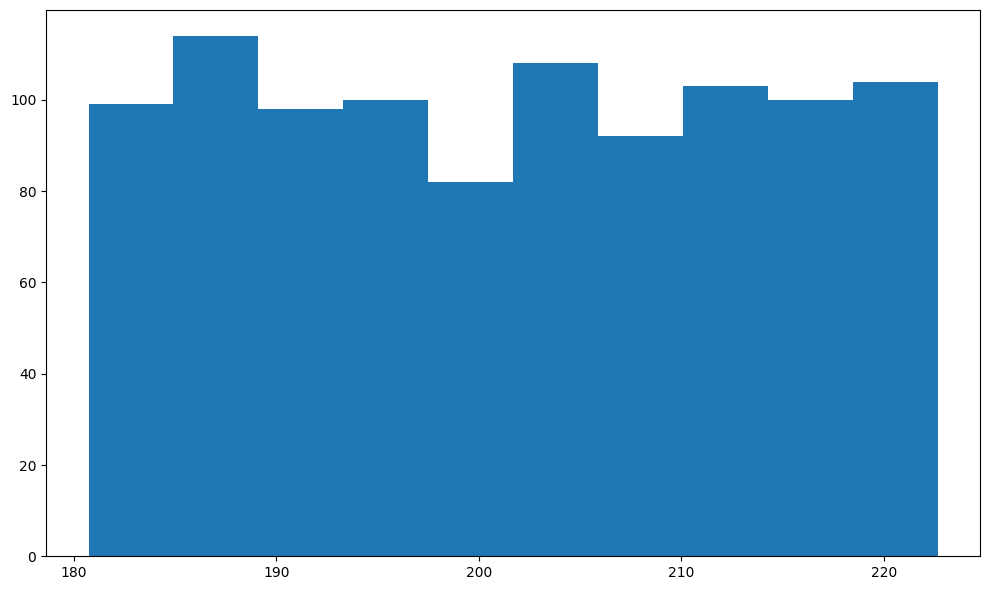

In [130]:
wrong_sample = np.random.rand(1000)*2*std+mean-std
plt.figure(figsize=(10,6))
plt.hist(wrong_sample)
plt.tight_layout()
plt.show()

## רווחי סמך

בואו נחשב עכשיו רווחי סמך למשקל ולגובה של שחקני בייסבול. נשתמש בקוד [מהדיון הזה ב-StackOverflow](https://stackoverflow.com/questions/15033511/compute-a-confidence-interval-from-sample-data):


In [131]:
import scipy.stats

def mean_confidence_interval(data, confidence=0.95):
    a = 1.0 * np.array(data)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)
    return m, h

for p in [0.85, 0.9, 0.95]:
    m, h = mean_confidence_interval(df['Weight'].fillna(method='pad'),p)
    print(f"p={p:.2f}, mean = {m:.2f} ± {h:.2f}")

p=0.85, mean = 73.70 ± 0.10
p=0.90, mean = 73.70 ± 0.12
p=0.95, mean = 73.70 ± 0.14


## בדיקת השערות

בואו נחקור תפקידים שונים במאגר הנתונים של שחקני הבייסבול שלנו:


In [132]:
df.groupby('Role').agg({ 'Weight' : 'mean', 'Height' : 'mean', 'Age' : 'count'}).rename(columns={ 'Age' : 'Count'})

Weight      Height  Count
Role                                           
Catcher            72.723684  204.328947     76
Designated_Hitter  74.222222  220.888889     18
First_Baseman      74.000000  213.109091     55
Outfielder         73.010309  199.113402    194
Relief_Pitcher     74.374603  203.517460    315
Second_Baseman     71.362069  184.344828     58
Shortstop          71.903846  182.923077     52
Starting_Pitcher   74.719457  205.321267    221
Third_Baseman      73.044444  200.955556     45

בואו נבחן את ההשערה ששחקני בסיס ראשון גבוהים יותר משחקני בסיס שני. הדרך הפשוטה ביותר לעשות זאת היא לבדוק את רווחי הביטחון:


In [133]:
for p in [0.85,0.9,0.95]:
    m1, h1 = mean_confidence_interval(df.loc[df['Role']=='First_Baseman',['Height']],p)
    m2, h2 = mean_confidence_interval(df.loc[df['Role']=='Second_Baseman',['Height']],p)
    print(f'Conf={p:.2f}, 1st basemen height: {m1-h1[0]:.2f}..{m1+h1[0]:.2f}, 2nd basemen height: {m2-h2[0]:.2f}..{m2+h2[0]:.2f}')

Conf=0.85, 1st basemen height: 209.36..216.86, 2nd basemen height: 182.24..186.45
Conf=0.90, 1st basemen height: 208.82..217.40, 2nd basemen height: 181.93..186.76
Conf=0.95, 1st basemen height: 207.97..218.25, 2nd basemen height: 181.45..187.24


אנו יכולים לראות שהטווחים אינם חופפים.

דרך סטטיסטית מדויקת יותר להוכחת ההשערה היא להשתמש ב-**Student t-test**:


In [134]:
from scipy.stats import ttest_ind

tval, pval = ttest_ind(df.loc[df['Role']=='First_Baseman',['Height']], df.loc[df['Role']=='Second_Baseman',['Height']],equal_var=False)
print(f"T-value = {tval[0]:.2f}\nP-value: {pval[0]}")

T-value = 9.77
P-value: 1.4185554184322326e-15


שני הערכים שמחזירה הפונקציה `ttest_ind` הם:
* ערך ה-p ניתן להיחשב כהסתברות ששתי ההתפלגויות בעלות ממוצע זהה. במקרה שלנו, הוא נמוך מאוד, מה שמעיד על כך שיש ראיות חזקות לכך ששחקני בסיס ראשון גבוהים יותר.
* ערך ה-t הוא הערך הביניים של ההבדל המנורמל בממוצעים, שמשמש במבחן ה-t, והוא מושווה לערך סף עבור רמת ביטחון נתונה.


## סימולציה של התפלגות נורמלית באמצעות משפט הגבול המרכזי

מחולל המספרים הפסאודו-אקראי בפייתון מתוכנן לספק לנו התפלגות אחידה. אם נרצה ליצור מחולל להתפלגות נורמלית, נוכל להשתמש במשפט הגבול המרכזי. כדי לקבל ערך שמתפלג נורמלית, פשוט נחשב ממוצע של מדגם שנוצר בהתפלגות אחידה.


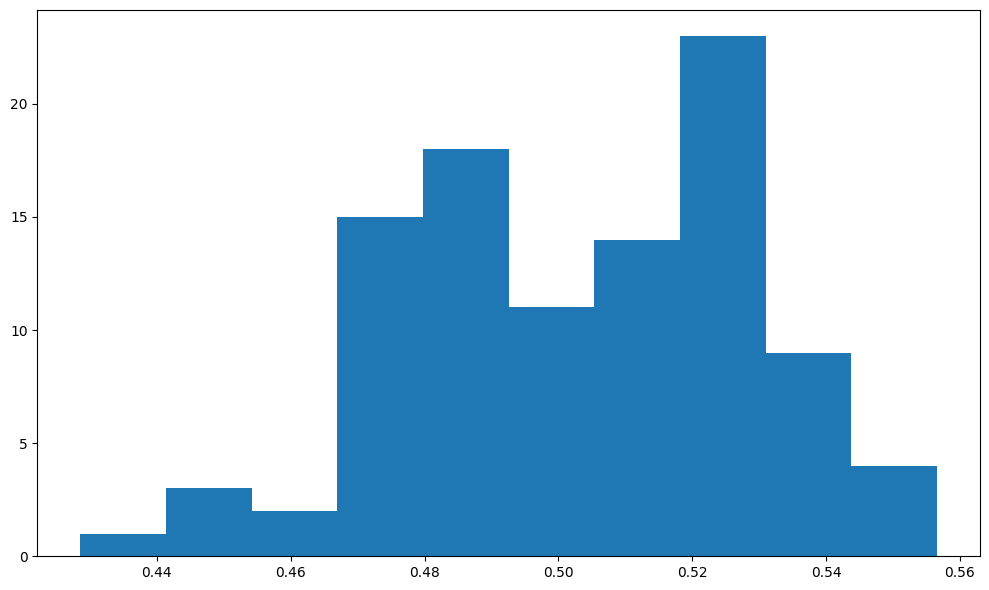

In [135]:
def normal_random(sample_size=100):
    sample = [random.uniform(0,1) for _ in range(sample_size) ]
    return sum(sample)/sample_size

sample = [normal_random() for _ in range(100)]
plt.figure(figsize=(10,6))
plt.hist(sample)
plt.tight_layout()
plt.show()

## מתאם ותאגיד הבייסבול המרושע

מתאם מאפשר לנו למצוא קשרים בין רצפי נתונים. בדוגמה שלנו, נניח שקיים תאגיד בייסבול מרושע שמשלם לשחקניו לפי הגובה שלהם - ככל שהשחקן גבוה יותר, כך הוא/היא מקבל/ת יותר כסף. נניח שיש שכר בסיס של $1000, ובונוס נוסף שנע בין $0 ל-$100, בהתאם לגובה. ניקח את השחקנים האמיתיים מ-MLB, ונחשב את המשכורות הדמיוניות שלהם:


In [136]:
heights = df['Height']
salaries = 1000+(heights-heights.min())/(heights.max()-heights.mean())*100
print(list(zip(heights, salaries))[:10])

[(180, 1033.985209531635), (215, 1073.6346206518763), (210, 1067.9704190632704), (210, 1067.9704190632704), (188, 1043.0479320734046), (176, 1029.4538482607504), (209, 1066.837578745549), (200, 1056.6420158860585), (231, 1091.760065735415), (180, 1033.985209531635)]


בואו כעת נחשב את השונות המשותפת והמתאם של הרצפים הללו. `np.cov` ייתן לנו את מה שנקרא **מטריצת השונות המשותפת**, שהיא הרחבה של שונות משותפת למספר משתנים. האלמנט $M_{ij}$ של מטריצת השונות המשותפת $M$ הוא המתאם בין משתני הקלט $X_i$ ו-$X_j$, והערכים האלכסוניים $M_{ii}$ הם השונות של $X_{i}$. באופן דומה, `np.corrcoef` ייתן לנו את **מטריצת המתאם**.


In [137]:
print(f"Covariance matrix:\n{np.cov(heights, salaries)}")
print(f"Covariance = {np.cov(heights, salaries)[0,1]}")
print(f"Correlation = {np.corrcoef(heights, salaries)[0,1]}")

Covariance matrix:
[[441.63557066 500.30258018]
 [500.30258018 566.76293389]]
Covariance = 500.3025801786725
Correlation = 0.9999999999999997


מתאם השווה ל-1 אומר שיש **קשר ליניארי חזק** בין שני משתנים. ניתן לראות את הקשר הליניארי באופן חזותי על ידי שרטוט ערך אחד מול השני:


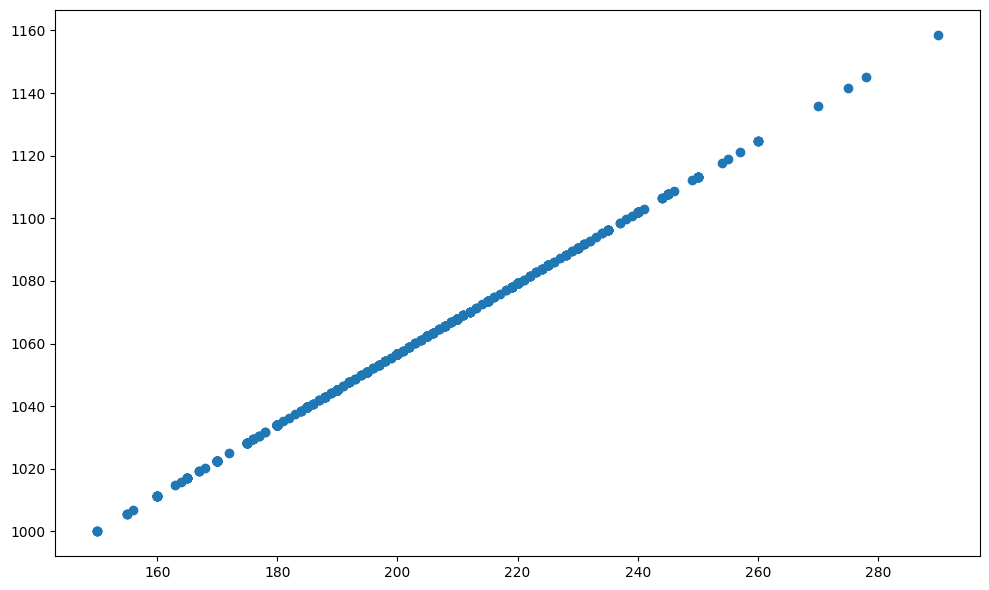

In [138]:
plt.figure(figsize=(10,6))
plt.scatter(heights,salaries)
plt.tight_layout()
plt.show()

בואו נראה מה קורה אם הקשר אינו ליניארי. נניח שהתאגיד שלנו החליט להסתיר את התלות הליניארית הברורה בין גבהים למשכורות, והכניס אי-ליניאריות כלשהי לנוסחה, כמו `sin`:


In [139]:
salaries = 1000+np.sin((heights-heights.min())/(heights.max()-heights.mean()))*100
print(f"Correlation = {np.corrcoef(heights, salaries)[0,1]}")

Correlation = 0.9910655775558532


במקרה זה, הקורלציה קטנה מעט, אך היא עדיין די גבוהה. כעת, כדי להפוך את הקשר לפחות ברור, ייתכן שנרצה להוסיף מעט אקראיות נוספת על ידי הוספת משתנה אקראי למשכורת. בואו נראה מה קורה:


In [140]:
salaries = 1000+np.sin((heights-heights.min())/(heights.max()-heights.mean()))*100+np.random.random(size=len(heights))*20-10
print(f"Correlation = {np.corrcoef(heights, salaries)[0,1]}")

Correlation = 0.948230287835537


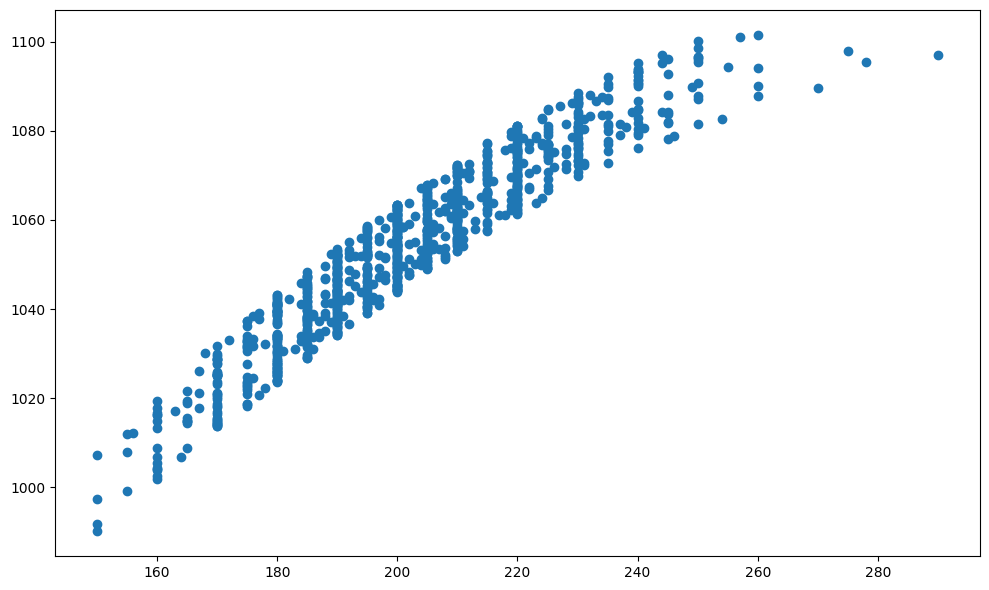

In [141]:
plt.figure(figsize=(10,6))
plt.scatter(heights, salaries)
plt.tight_layout()
plt.show()

> האם אתה יכול לנחש מדוע הנקודות מסתדרות בקווים אנכיים בצורה כזו?

שמנו לב לקשר בין מושג מהונדס באופן מלאכותי כמו שכר לבין המשתנה הנצפה *גובה*. בואו נראה גם אם שני משתנים נצפים, כמו גובה ומשקל, קשורים זה לזה:


In [142]:
np.corrcoef(df['Height'],df['Weight'])

array([[1.        , 0.52959196],
       [0.52959196, 1.        ]])

למרבה הצער, לא קיבלנו תוצאות - רק ערכים מוזרים מסוג `nan`. הסיבה לכך היא שחלק מהערכים בסדרה שלנו אינם מוגדרים, ומיוצגים כ-`nan`, מה שגורם לכך שגם תוצאת החישוב אינה מוגדרת. אם נסתכל על המטריצה, נוכל לראות שעמודת `Weight` היא הבעייתית, מכיוון שהחישוב של המתאם העצמי בין ערכי `Height` בוצע.

> דוגמה זו מדגישה את החשיבות של **הכנת נתונים** ו**ניקוי נתונים**. ללא נתונים תקינים, לא נוכל לחשב דבר.

בואו נשתמש בשיטת `fillna` כדי למלא את הערכים החסרים, ונחשב את המתאם:


In [143]:
np.corrcoef(df['Height'],df['Weight'].fillna(method='pad'))

array([[1.        , 0.52959196],
       [0.52959196, 1.        ]])

אכן ישנה קורלציה, אך לא חזקה כל כך כמו בדוגמה המלאכותית שלנו. למעשה, אם נסתכל על תרשים הפיזור של ערך אחד מול השני, הקשר יהיה הרבה פחות ברור:


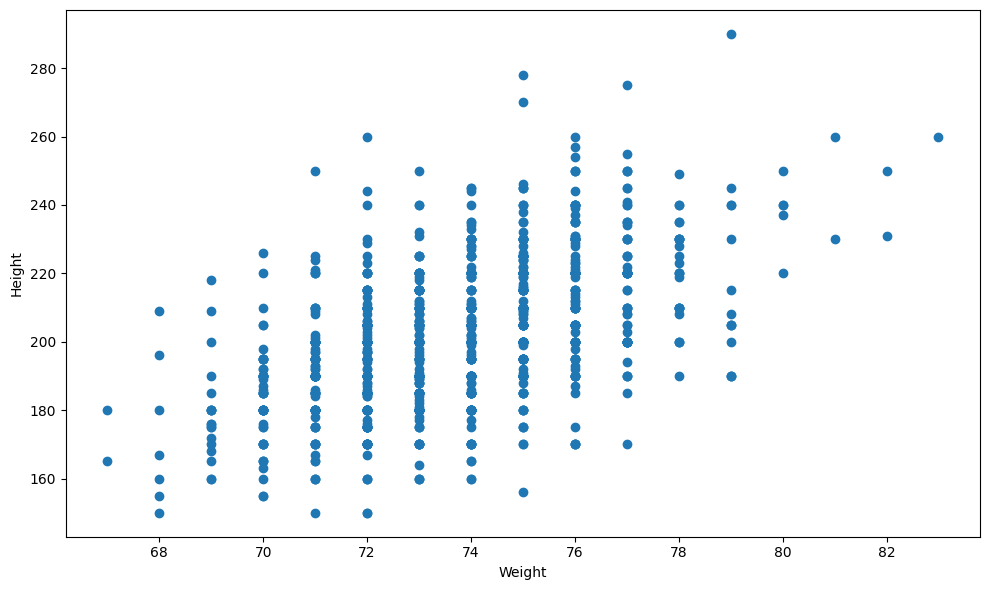

In [144]:
plt.figure(figsize=(10,6))
plt.scatter(df['Weight'],df['Height'])
plt.xlabel('Weight')
plt.ylabel('Height')
plt.tight_layout()
plt.show()

## סיכום

במחברת זו למדנו כיצד לבצע פעולות בסיסיות על נתונים כדי לחשב פונקציות סטטיסטיות. כעת אנו יודעים כיצד להשתמש בכלים מתמטיים וסטטיסטיים כדי להוכיח השערות מסוימות, וכיצד לחשב רווחי סמך עבור משתנים שונים בהתבסס על מדגם נתונים.



---

**כתב ויתור**:  
מסמך זה תורגם באמצעות שירות תרגום מבוסס בינה מלאכותית [Co-op Translator](https://github.com/Azure/co-op-translator). למרות שאנו שואפים לדיוק, יש לקחת בחשבון שתרגומים אוטומטיים עשויים להכיל שגיאות או אי-דיוקים. המסמך המקורי בשפתו המקורית נחשב למקור הסמכותי. למידע קריטי, מומלץ להשתמש בתרגום מקצועי על ידי בני אדם. איננו נושאים באחריות לכל אי-הבנה או פרשנות שגויה הנובעת משימוש בתרגום זה.
